In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
data = {
    "Temperature": ["High", "High", "Medium", "Medium", "High", "Medium", "High", "Medium", "Medium", "High"],
    "Wind Direction": ["South", "West", "West", "South", "West", "South", "West", "South", "South", "South"],
    "Rainy": ["No", "Yes", "No", "No", "No", "Yes", "No", "No", "Yes", "No"],
    "Humidity": ["High", "High", "High", "High", "Medium", "High", "High", "High", "High", "Medium"],
    "Going Out": ["Yes", "Yes", "Yes", "No", "No", "No", "Yes", "Yes", "No", "Yes"]
}

In [3]:
df = pd.DataFrame(data)

le = preprocessing.LabelEncoder()
encoded_df = df.apply(le.fit_transform)

X = encoded_df.drop(columns=["Going Out"])
y = encoded_df["Going Out"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion="gini", random_state=42)

clf.fit(X_train, y_train)

rules = export_text(clf, feature_names=list(X.columns))
print("Decision Tree Rules:")
print(rules)

Decision Tree Rules:
|--- Rainy <= 0.50
|   |--- Humidity <= 0.50
|   |   |--- Wind Direction <= 0.50
|   |   |   |--- Temperature <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Temperature >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Wind Direction >  0.50
|   |   |   |--- class: 1
|   |--- Humidity >  0.50
|   |   |--- Wind Direction <= 0.50
|   |   |   |--- class: 1
|   |   |--- Wind Direction >  0.50
|   |   |   |--- class: 0
|--- Rainy >  0.50
|   |--- class: 0




Model Accuracy: 50.00%


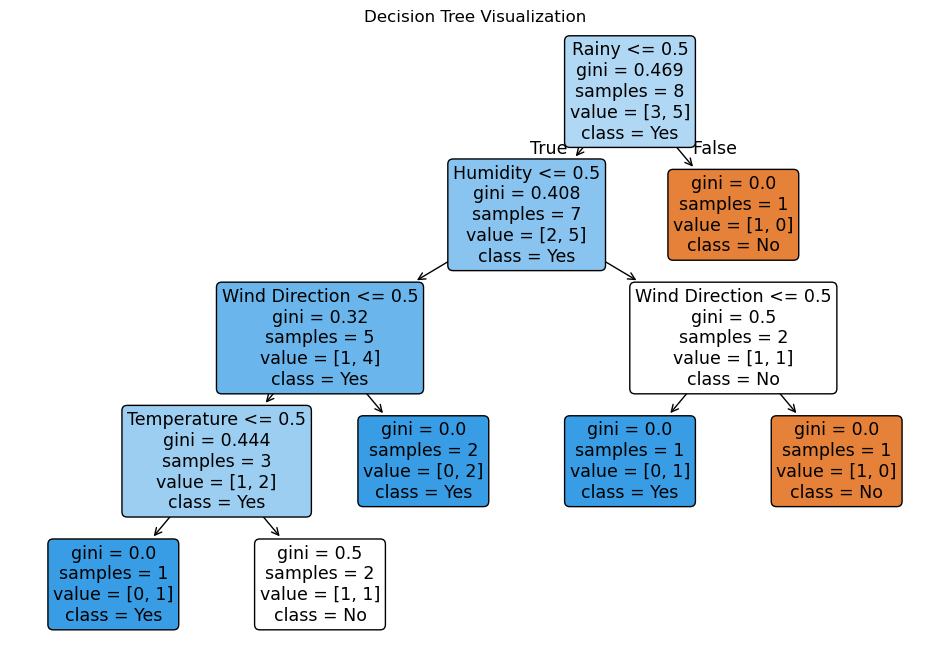

In [4]:
accuracy = clf.score(X_test, y_test)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=["No", "Yes"], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()